##Mission Statement

The goal of this project is to practice and refine my programming, exploratory data analysis, and machine learning skills while building a robust portfolio to help me secure a job in the field.

This workbook focuses on designing and comparing various models to address a single challenge: detecting fraudulent credit card transactions. Throughout the workbook, I will guide you through my thought process, explaining what I did, why I did it, and how it works. My aim is to make this journey both insightful and educational for anyone following along.

Thank you for your time and attention.

– Jorgé

The Credit Card Fraud Detection dataset is a publicly available dataset on Kaggle, designed to address the critical issue of detecting fraudulent credit card transactions.

The dataset focuses on enabling credit card companies to identify fraudulent transactions to protect customers from unauthorized charges.

**True Transactions**:

- 284,807 total transactions

**Fraudulent Transactions**:
- 492 transactions (approximately 0.172% of the dataset, meaning we have an imbalanced dataset, oh boy!)

**Duration**:
- Data spans over two days in September 2013

**Data Characteristics:**
- Highly imbalanced, with the majority of transactions being legitimate.

Features include:

- Time: Seconds elapsed between a transaction and the first transaction.
- Amount: Transaction monetary amount.
- V1–V28: Numerical features resulting from Principal Component Analysis (PCA) applied to anonymize sensitive information.
- Class: Target variable (0 = non-fraudulent, 1 = fraudulent).

**Evaluation Metrics:**
Since the dataset's class imbalance, I will use the Area Under the Precision-Recall Curve (AUPRC) for evaluation instead of accuracy or confusion matrix-based metrics.

The dataset can be downloaded directly from the Kaggle page via this [link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).

##DATA INGESTION

I began by importing the necessary libraries for this task. Specifically, I imported Pandas for dataset manipulation, numpy for numerical purposes and Matplotlib and Seaborn for graph visualization.

In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next I unziped my dataset since colab does not allow you to upload csv's directly.

In [ ]:
#Unzipping files
!unzip /content/archive.zip -d /content/extracted_files

I then read the newly unzipped csv and stored it into a pandas df.

In [ ]:
#Reading File
df = pd.read_csv('/content/extracted_files/creditcard.csv')

I then made sure that the datasets was properly imported by calling pandas head() method to display the column headers.

In [ ]:
#Displaying Head of Df
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Dictionary for `creditcard.csv`

This dataset represents credit card transactions, with each row corresponding to a single transaction.  
Most columns (`V1` through `V28`) appear to be principal components or transformations to protect sensitive information.  
Below are brief explanations of the columns:

- **Time**  
  - *Definition*: Number of seconds elapsed between this transaction and the first transaction in the dataset.  
  - *Notes*: Helps track the sequence of transactions. Ranges from approximately 0 to ~172,792 seconds.

- **V1 – V28**  
  - *Definition*: Features resulting from a Principal Component Analysis (PCA) or similar dimensionality reduction to preserve anonymity of sensitive data.  
  - *Notes*: Their exact meanings are not public, but they capture variance in the original feature space.

- **Amount**  
  - *Definition*: The transaction amount.  
  - *Notes*: Useful for determining potential fraud patterns based on transaction size.

- **Class**  
  - *Definition*: The fraud indicator (target variable).  
  - *Values*:
    - `0`: Genuine (non-fraudulent) transaction
    - `1`: Fraudulent transaction


##EDA

Once I had my data ingested I began the exploratory data analysis to see what sanitation I would have to do. The first thing I checked was the shape of our newly created dataframe, which had 284807 rows and 31 columns.

In [ ]:
df.shape

(284807, 31)

I then called the columns method to output the names of the column (I know I already did this, but I just wanted to double check).

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

I then called the info method to see what datatype each column stored. As we can see all columns were of type float64 except for 'Class' which was int 64. Since our class contains binary integers (0 for legit and 1 for fradualent) there is no need to save it as a float.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

I then checked our dataframe for any null values, which luckly contained none.

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Next, I wanted a breif "screenshot" our data. I called the describe method to output the count, mean, max, and standard diviation of the 3 classes I found most important: Time, Amount, and Class. I also used the round() just to make it easier to read the decimals.

In [ ]:
df[['Time', 'Amount', 'Class']].describe().round(2)

,Time,Amount,Class
count,284807.00,284807.00,284807.00
mean,94813.86,88.35,0.00
std,47488.15,250.12,0.04
min,0.00,0.00,0.00
25%,54201.50,5.60,0.00
50%,84692.00,22.00,0.00
75%,139320.50,77.16,0.00
max,172792.00,25691.16,1.00


I knew the dataset was imbalanced but I wanted a clearer picture so I called the value_counts method on the 'Class' column to see how many values were contained in each class.
As we can see there are 492 fradualnt credit card charges in our datase compared to 284315 real ones.

In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


And just to be extra I wanted practice vizualizing this difference. I used matplots plot method to display a graph showing the class imbalance.

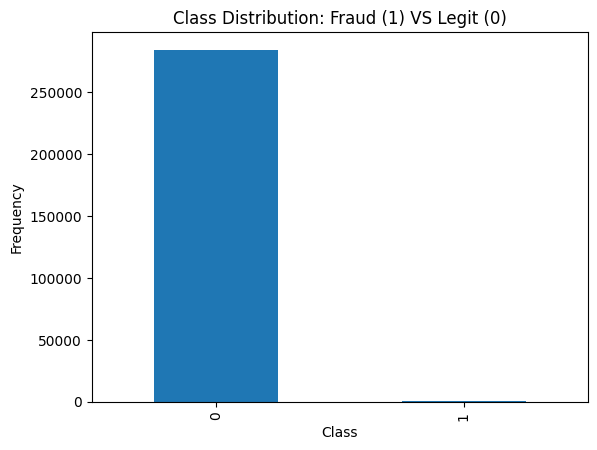

In [ ]:
df['Class'].value_counts().plot(kind = 'bar')
plt.title('Class Distribution: Fraud (1) VS Legit (0)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

Since the 'Time' column stored time in seconds, I decided it would be easier to visualize by converting it into the actual time of day. To achieve this, I created a new column named 'Time_in_Hours'. This column was calculated by dividing the 'Time' column by 3600 (to convert seconds to hours) and then taking its modulo by 24 (to represent the hours of the day). This transformation effectively converted the time in seconds into a 24-hour format.

Next, I created two graphs to plot the distributions of time and amount:

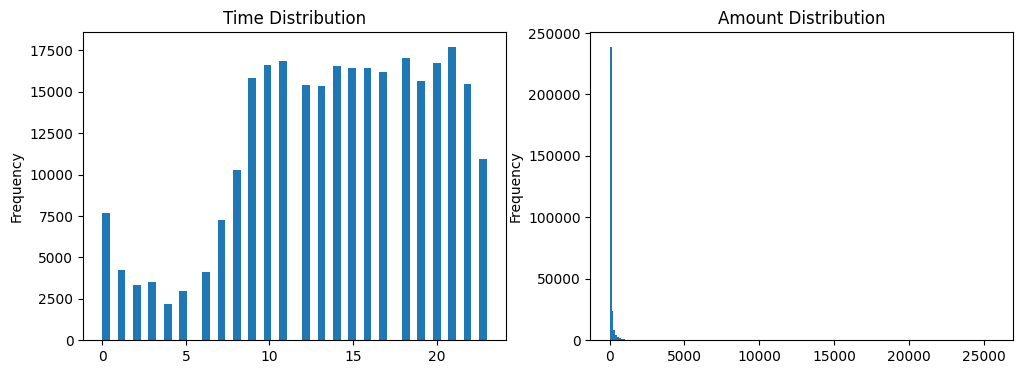

In [ ]:
df['Time_in_Hours'] = df['Time'] // 3600 % 24

fig, axes = plt.subplots(1,2, figsize =(12,4))
df['Time_in_Hours'].plot(kind = 'hist', bins=50, ax=axes[0], title='Time Distribution')
df['Amount'].plot(kind = 'hist', bins = 200, ax = axes[1], title = 'Amount Distribution')
plt.show()

Insights:
- Time: Transactions are cyclical, meaning that purchases follow a natural eb and flow, which makes sense people usually buy stuff when they are awake
- Amount: Most transactions are under 5000$


Next, I wanted to investigate whether fraudulent charges exhibited a cyclical pattern. To explore this, I created a plot that overlaid the distributions of fraudulent and non-fraudulent charges over time. Given the significant imbalance in the data (approximately 95:5 ratio of non-fraudulent to fraudulent charges), I chose to use a logarithmic scale for the plot to make the comparison more visible.

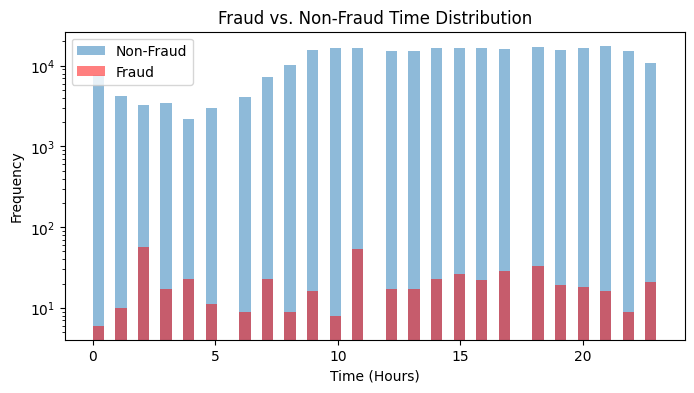

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
df[df['Class'] == 0]['Time_in_Hours'].plot(kind='hist', bins=50, alpha=0.5, label='Non-Fraud', ax=ax)
df[df['Class'] == 1]['Time_in_Hours'].plot(kind='hist', bins=50, alpha=0.5, color='red', label='Fraud', ax=ax)
ax.set_title('Fraud vs. Non-Fraud Time Distribution')
ax.set_yscale('log')
ax.set_xlabel('Time (Hours)')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

The insights I gathered from this graph were that Fraud seems to follow same cyclical cycle as the amount of transactions and most fraud happens at 11am.

Next, I wanted to explore the distribution of the numerical features in the dataset. To do this, I created histograms for all columns from the second to the 28th (using iloc to select these features). Each histogram was generated with 30 bins to provide a detailed view of the data distribution. To ensure the plots were large and readable, I specified a figure size of 16 by 12. Finally, I used tight_layout() to prevent overlap between subplots, creating a clear and organized visualization of the feature distributions.

<Figure size 1600x1200 with 0 Axes>

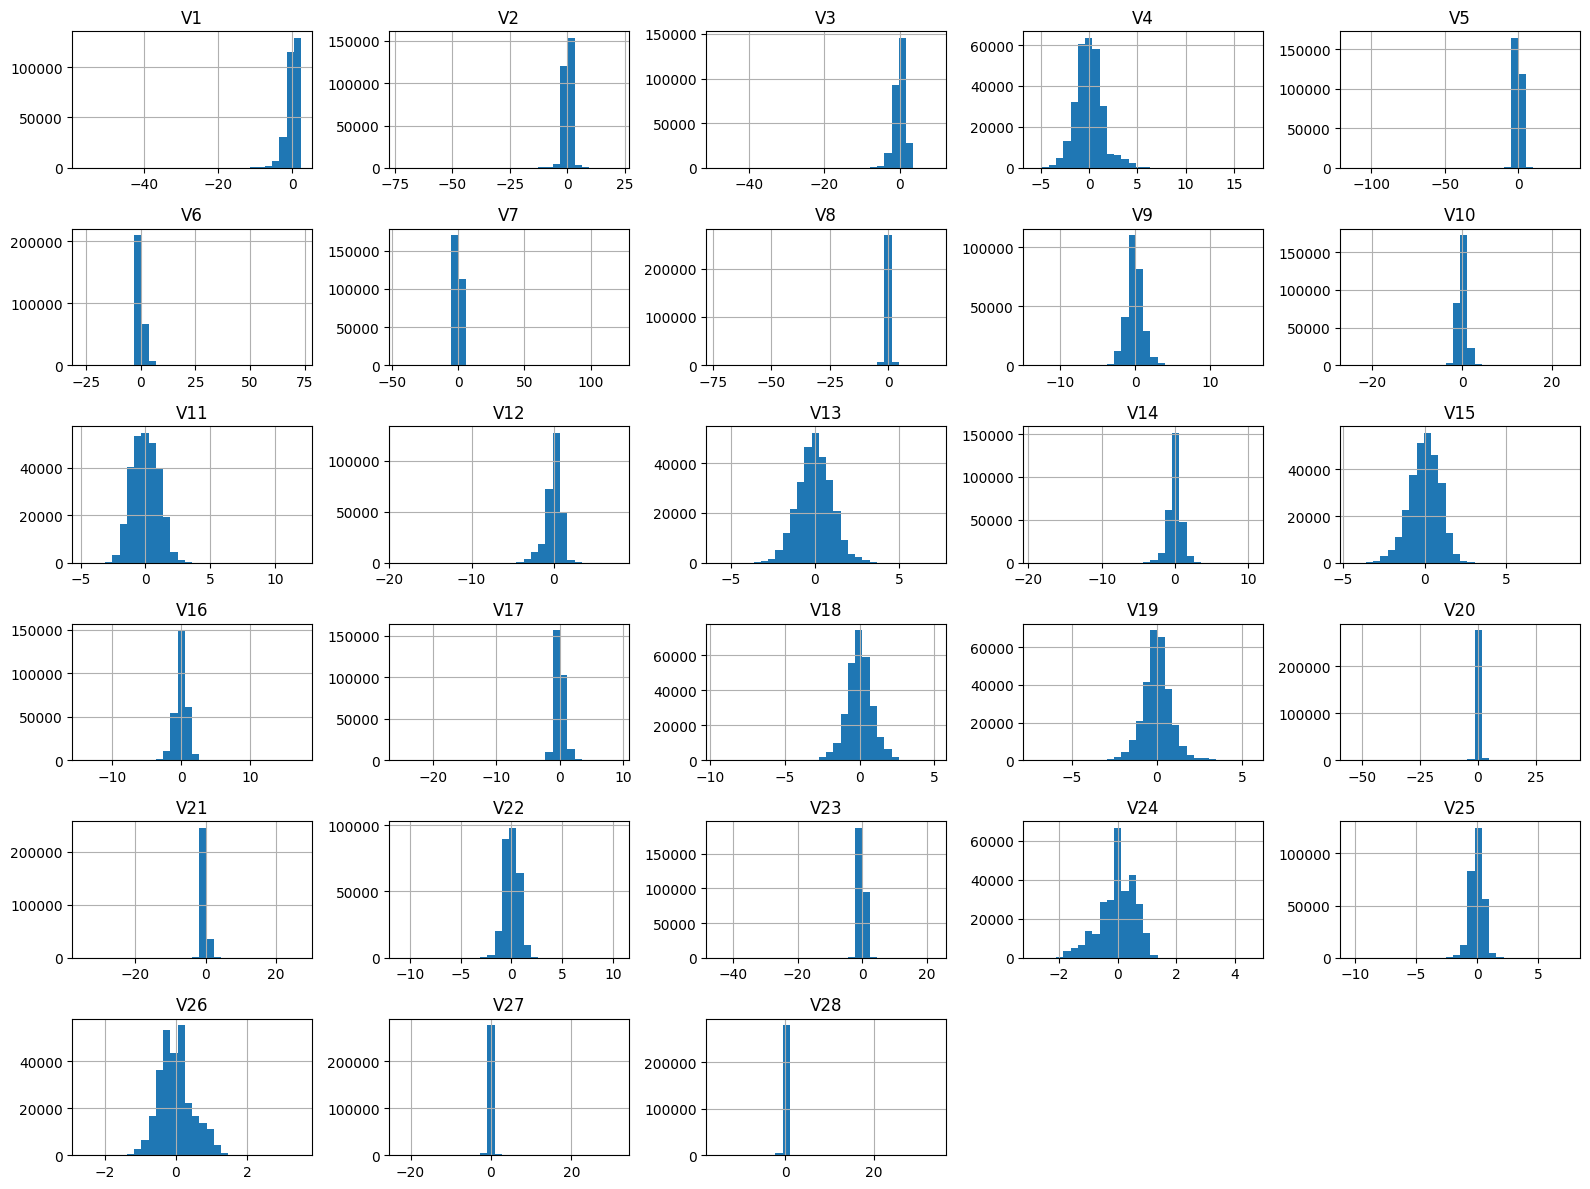

In [ ]:
plt.figure(figsize=(16,12))
df.iloc[:, 1:29].hist(bins=30, figsize=(16, 12))
plt.tight_layout()
plt.show()

Next, I created a correlation heatmap using Seaborn to examine whether any features in the dataset were strongly correlated with one another. This visualization aimed to identify potential relationships that could be useful for analysis or modeling. Unfortunately, the heatmap revealed that none of the features exhibited significant correlations.

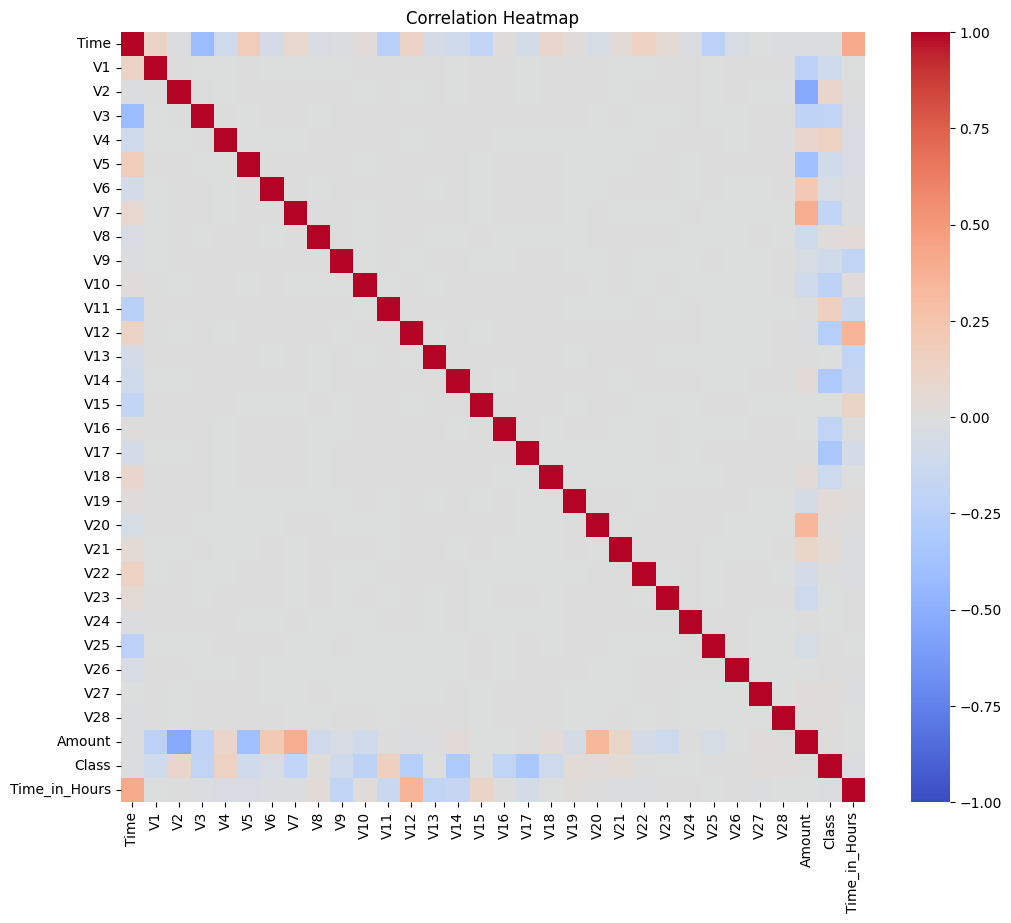

In [ ]:
plt.figure(figsize = (12,10))
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

At this stage, I decided I had gathered enough insights and moved on to the next step: feature engineering, which involved creating new columns. This process is crucial for shaping the dataset to highlight the specific patterns and relationships we want our models to focus on during training.

##Feature Engineering

I started off by creating time segments broken down by Morning, Afternoon, Evening and Night. This was made easier because of the Time_in_Hours column I made previously.

In [ ]:
def assign_day_segment(hour):
  if 6 <= hour <= 12:
    return 'Morning'
  elif 12 < hour <= 18:
    return 'Afternoon'
  elif 18 <= hour < 24:
    return 'Evening'
  else:
    return 'Night'

df['Time_of_day'] = df['Time_in_Hours'].apply(assign_day_segment)

numpy's log1p method compresses large numbers and stretches smaller ones, making the range of values more manageable for analysis. This highlights patterns or outliers that are otherwise masked by raw data. For example,

* $10 → ln(1 + 10): $2.4

* $10,000 → ln(1 + 10,000): $9.2 (smaller relative difference)

Since High-value transactions are more likely to be fraudulent, and the log transformation makes these stand out in plots or statistical analyses


On the other hand the cut method creates categories. Rather than using continuous values (e.g., $5, $500), we group the data into bins.


In [ ]:
# Unusually high or low transaction amounts might indicate fraud.
df['log_amount'] = np.log1p(df['Amount'])

# Creates categories that simplify analysis.
df['Binned_Amount'] = pd.cut(df['Amount'], bins=[0, 100, 500, 1000, 10000], labels=['Low', 'Medium', 'High', 'Very High'])

Unusual spikes in transaction activity at specific times of the day can signify fraudulent behavior. For example, if there are many more transactions than usual in an odd time frame (e.g., 3 AM), it might signal suspicious activity. I created a new column that calculates the density of transactions for each hour of the day by grouping the data by Time_in_Hours (which represents the hour of the day the transaction occurred) and counts the number of transactions for each hour.


According to online sources legitimate transactions often follow predictable patterns. If the Amount_Per_Hour is unusually high for a given time frame, it could indicate anomalous behavior. I created a column to calculate the intensity of transaction amounts for each hour by dividing the transaction amount (Amount) by the hour (Time_in_Hours + 1).
*The addition of 1 avoids division by zero for transactions occurring in the first hour (midnight).*

In [ ]:
#Captures the density of transactions during specific times.
df['Transactions_Per_Hour'] = df.groupby('Time_in_Hours')['Time'].transform('count')

#Highlights the intensity of transactions in a given time period.
df['Amount_Per_Hour'] = df['Amount'] / (df['Time_in_Hours'] + 1)  # +1 to avoid division by zero

Fraud often involves transactions that deviate significantly from routine behaviour. By comparing individual transactions to the average, we can determine whether the transaction is in line with typical spending patterns. The newly created df['Deviation_From_Avg_Amount'] calculates the difference between each transaction amount (Amount) and the average transaction amount, df['Amount'].mean()


In [ ]:
df['Deviation_From_Avg_Amount'] = df['Amount'] - df['Amount'].mean()

df['Amount_Per_Std'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

This line of code uses pandas get_dummies method to one-hot encode both Time_of_day and Binned_Amount columns, turining categorical data into numerical form so that our model can take it in as input.

In [ ]:
df = pd.get_dummies(df, columns=['Time_of_day', 'Binned_Amount'], drop_first=True)

##Modeling

For the initial model, I opted for a basic logistic regression approach using the sklearn library. Logistic regression is well-suited for classification problems, making it an excellent choice for distinguishing between fraudulent and legitimate transactions.




In [ ]:
#Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


To prepare the data for training, I began by separating the target variable (the column we aim to predict) from the rest of the dataset. This ensures the model focuses only on the input features during training, without inadvertently learning from the target itself. Specifically, I dropped the Class column, which contains the labels for fraud detection, along with the Time column, as it was not directly relevant to the predictive task.

In [ ]:
#Target Variable
X = df.drop(columns = ['Class', 'Time'])
y = df['Class']

I used sklearn's train-test split method to divide the dataset into training and testing sets. I opted for an 80:20 split, where 80% of the data was used to train the model, and 20% was reserved for testing. This approach ensures the model is evaluated on unseen data to measure its performance accurately.

To maintain the 95:5 ratio of non-fraudulent to fraudulent transactions, I utilized the stratify parameter. This ensures both the training and testing sets reflect the same distribution, providing better representation and balanced evaluation of the model.

Next, I applied a scaling step using StandardScaler to standardize the features. Scaling ensures that all features have a mean of 0 and a standard deviation of 1, which is critical for models like logistic regression that are sensitive to the scale of input features. This step helps prevent features with larger magnitudes from dominating the model and allows for fair comparisons across all variables.

In [ ]:
#The training and testing sets will each maintain the 95:5 ratio of non-fraud to fraud, ensuring better representation and balanced evaluation of the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

#Scaling ensures fair comparisons across features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

I then built our first model using sklearn's LogisticRegression method and proceeded to train it.

To ensure robust training, I set the random_state parameter to 42 for reproducibility and increased the max_iter parameter to 1000 to allow the model sufficient iterations to converge during the training process. After defining the model, I trained it on the prepared training dataset.

In [ ]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

I then evaluated the model's performance by generating predictions using the predict method and assessing probabilities with the predict_proba method.

The predict method outputs the model's classification for each transaction, either as fraudulent or legitimate. Meanwhile, the predict_proba method provides the probability scores for each class, offering insight into the model's confidence in its predictions. This is particularly useful for understanding borderline cases where the model's confidence may be lower.

In [ ]:
#Generates prediction and outputs a 1D array of binary predictions
y_pred = model.predict(X_test)
#Retrieves the probabilities for the fraud class
y_pred_probability = model.predict_proba(X_test)[:, 1]

In [ ]:
print("Logistic Regression Metrics:")
print(classification_report(y_test, y_pred))

Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.66      0.73        98

    accuracy                           1.00     56962
   macro avg       0.90      0.83      0.86     56962
weighted avg       1.00      1.00      1.00     56962



To evaluate the performance of our Logistic Regression model, I used standard classification metrics including precision, recall, and F1-score. These metrics provide insights into how well the model distinguishes between fraudulent (class 1) and legitimate (class 0) transactions. Below are the results of the evaluation:

Precision: Of all the transactions the model predicted as fraud, how many were truly fraud?

-  All predictions for non-fraud are correct.
- 81% of the predicted fraud cases are correct.

Recall: Of all the actual fraudulent transactions, how many did the model correctly predict as fraud?

- The model identified all the actual non-fraud cases.
- The model caught only 68% of the actual fraud cases.

F1: A harmonic mean of precision and recall, providing a balanced evaluation of the model. The F1-score for fraudulent transactions is 73%, showing a decent balance between identifying true positives and minimizing false negatives.

Accuracy: The overall percentage of correct predictions (both fraud and non-fraud).
- Despite poor recall for fraud (68%), the overwhelming size of Class 0 dominates the accuracy calculation.

In [ ]:
# Calculate ROC-AUC (Receiver Operating Characteristic Curve) (Area Under Curve)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("ROC-AUC Score:" , roc_auc)


ROC-AUC Score: 0.961057101512524


A high ROC-AUC score means our model can effectively difirentiate between fraudulent and non-fraudulent transactions. Since our dataset is imbalanced, it captures the trade-off between sensitivity (recall) and specificity better than accuracy, recall and presicion.

Our next steps focus on improving the recall of the model by implementing a Neural Network (NN). In the context of fraud detection, recall is crucial because it ensures the model identifies as many fraudulent transactions as possible, even at the risk of flagging some legitimate transactions incorrectly.

In this case, it's better to have false positives (legitimate transactions flagged as fraudulent) than false negatives (fraudulent transactions missed by the model). Missing fraudulent activity can have severe financial and security consequences, whereas false positives can typically be resolved through manual verification processes. By leveraging the power of Neural Networks, we aim to enhance the model's ability to detect fraudulent transactions without compromising too much on precision, ultimately striking the right balance for effective fraud detection.

I decided to take a more rigorous approach by opting for a sequential Neural Network (NN), where I built the model layer by layer. This approach provided greater customizability, allowing me to tailor the architecture and parameters to the specific needs of the dataset and the fraud detection problem.

By designing the network from scratch, I could fine-tune aspects like the number of layers, neurons, activation functions, and regularization techniques, ensuring a more precise and adaptable model compared to using prebuilt options. This level of control was essential for addressing the nuances of the data and improving performance metrics such as recall and precision. I utilized the tensorflow library to achieve this.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


My Neural Network (NN) architecture was designed with a focus on balancing complexity and regularization to prevent overfitting while ensuring accurate predictions. The architecture began with a dense layer containing 32 neurons and utilizing the ReLU activation function. This activation function was chosen for its ability to introduce non-linearity, enabling the model to capture more complex relationships in the data.

To mitigate the risk of overfitting, I added a dropout layer with a 20% dropout rate, randomly disabling neurons during training to improve generalization. Next, I introduced another dense layer with 16 neurons, again using the ReLU activation function, followed by another dropout layer with a 20% rate.

Finally, the output layer consisted of a single dense neuron. Unlike the hidden layers, this layer employed the sigmoid activation function, as it outputs probabilities between 0 and 1, making it ideal for binary classification. This design was tailored to predict whether a transaction was fraudulent (1) or legitimate (0).

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


After constructing my model, I compiled it with a focus on optimizing accuracy and minimizing loss. For the loss function, I selected binary cross-entropy, which is well-suited for binary classification tasks as it measures the difference between predicted probabilities and actual labels.

I also configured the model's optimizer by using Adam, a popular choice for its adaptive learning capabilities. To ensure a stable learning process, I set the learning rate to 0.001, striking a balance between convergence speed and avoiding overshooting the optimal solution. By prioritizing these settings, the model was fine-tuned to effectively learn and distinguish between fraudulent and legitimate transactions.

In [ ]:
model.compile(loss = 'binary_crossentropy',
              metrics = ['accuracy'],
              optimizer = Adam(learning_rate = 0.001))

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs = 32,
                    batch_size = 64,
                    verbose=1)

Epoch 1/32
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9953 - loss: 0.0314
Epoch 2/32
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9992 - loss: 0.0039
Epoch 3/32
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9993 - loss: 0.0032
Epoch 4/32
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9994 - loss: 0.0031
Epoch 5/32
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9993 - loss: 0.0037
Epoch 6/32
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9994 - loss: 0.0030
Epoch 7/32
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9993 - loss: 0.0033
Epoch 8/32
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9994 - loss: 0.0027
Epoch 9/32
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9994 - loss: 0.0026
Epoch 10/32
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9995 - loss: 0.0022
Epoch 11/32
3561/3561 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9995 - loss: 0.0022
Epoch 12/32
3561/3561 ━━━━━

In [ ]:
# Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)
y_pred_proba = model.predict(X_test).ravel()

# Classification Report
print("Neural Network Performance:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Neural Network Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.78      0.82        98

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9735584653107163


After training my neural network, I evaluated its performance on the test set. The results demonstrated a significant improvement, particularly in detecting fraudulent transactions:

Precision: For the fraud class (1), the precision reached 87%, meaning 87% of flagged fraudulent transactions were correctly identified.
Recall: The recall for fraud detection improved to 78%, showing that the model captured 78% of all actual fraudulent transactions. This is a critical improvement since minimizing false negatives is key in fraud detection.

F1-Score: The harmonic mean of precision and recall for fraud transactions was 82%, reflecting a balanced performance.

Accuracy: The model achieved an overall accuracy of 100%, though this is influenced by the overwhelming presence of non-fraudulent transactions.
ROC-AUC Score: The ROC-AUC score of 0.97 indicates excellent discriminatory power, showcasing the model's ability to separate fraudulent and non-fraudulent transactions effectively.
These results highlight the neural network's robustness in handling imbalanced datasets, achieving both high recall and precision for fraudulent transactions, which are often the most challenging to classify.

For the next phase of this project, I chose to implement an Extreme Gradient Boosting (XGBoost) model. My primary motivation was to explore XGBoost, as I had not worked with it before. What sets XGBoost apart from traditional decision trees is its ensemble approach. A standard decision tree grows by splitting the data until it can no longer find meaningful splits (or until a predefined limit is reached), and it uses this single tree to make all predictions. In contrast, XGBoost builds multiple smaller decision trees sequentially, leveraging the strengths of ensemble learning.

This sequential process enhances performance by learning from the errors of previous trees. Each tree in the ensemble aims to correct the shortcomings of its predecessors, resulting in a model that not only improves accuracy but also boosts the robustness of the entire ensemble.

Below is the configuration I used for my XGBoost model:

Random State: Set to ensure reproducibility.
Max Depth: Limited to 5 to prevent overfitting.
Colsample Bytree: Adjusted to 0.8, ensuring only a fraction of features is used per tree, adding diversity.
Subsample: Set to 0.8 to randomly sample 80% of the training data for each tree, further reducing overfitting.
Learning Rate: Set to 0.01, making the model learn more slowly for fine-tuned improvements.
Number of Estimators: Defined as 100, representing the number of trees in the ensemble.
Scale Pos Weight: Set to balance the imbalanced dataset by scaling the positive class weight.
Evaluation Metric: Defined as 'logloss', optimizing the model for binary classification.
The model was trained on the scaled training data, ensuring that the features were normalized for optimal performance.

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    random_state=42,
    max_depth=5,
    colsample_bytree=0.8,
    subsample=0.8,
    learning_rate=0.01,
    n_estimators=100,
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-p

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=577.2868020304569, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluate
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_xgb_prob))

XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.25      0.87      0.39        98

    accuracy                           1.00     56962
   macro avg       0.63      0.93      0.70     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9827396982991283


The results from the XGBoost model highlight its impressive ability to handle imbalanced datasets and detect fraudulent transactions, offering a unique perspective when compared to the Logistic Regression and Neural Network models. With an accuracy of nearly 100%, XGBoost excels at classifying non-fraudulent transactions (precision and recall both 1.00 for class 0). However, its performance on fraudulent transactions reveals some trade-offs. The recall for class 1 (fraudulent transactions) is high at 0.87, meaning the model successfully identifies most fraudulent cases, but the precision drops to 0.25, indicating a significant number of false positives.

When compared to the Logistic Regression model, which had a recall of 0.66 and a precision of 0.80 for fraudulent transactions, XGBoost shows a significant improvement in recall, prioritizing the detection of fraud at the expense of precision. The Neural Network, on the other hand, struck a more balanced trade-off, achieving a recall of 0.78 and a precision of 0.87 for fraudulent transactions, while maintaining an excellent ROC-AUC score of 0.974. XGBoost surpasses both models in its ability to identify fraudulent transactions, as evidenced by its ROC-AUC score of 0.983, which reflects its strong capacity to distinguish between fraudulent and non-fraudulent transactions.

These results demonstrate that each model has its strengths and trade-offs. Logistic Regression provides a simple yet effective baseline, the Neural Network offers a flexible architecture with strong performance, and XGBoost combines its ensemble approach with advanced learning techniques to boost recall for rare events like fraud. Choosing the right model depends on the specific business objectives. For instance, XGBoost might be ideal in scenarios where detecting all fraudulent cases is critical, even if it means accepting more false positives, while the Neural Network may be more appropriate for applications requiring a balanced approach. This comparison underscores the importance of evaluating model performance in the context of the problem at hand.